In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


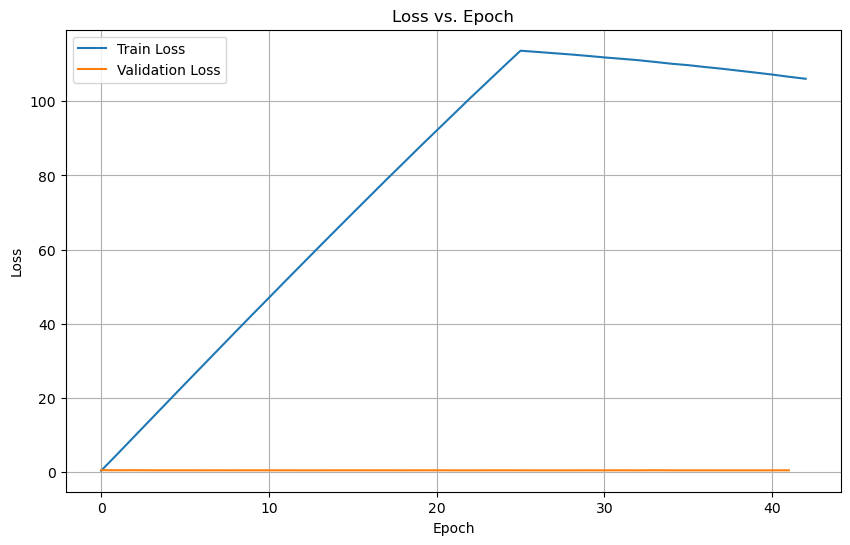

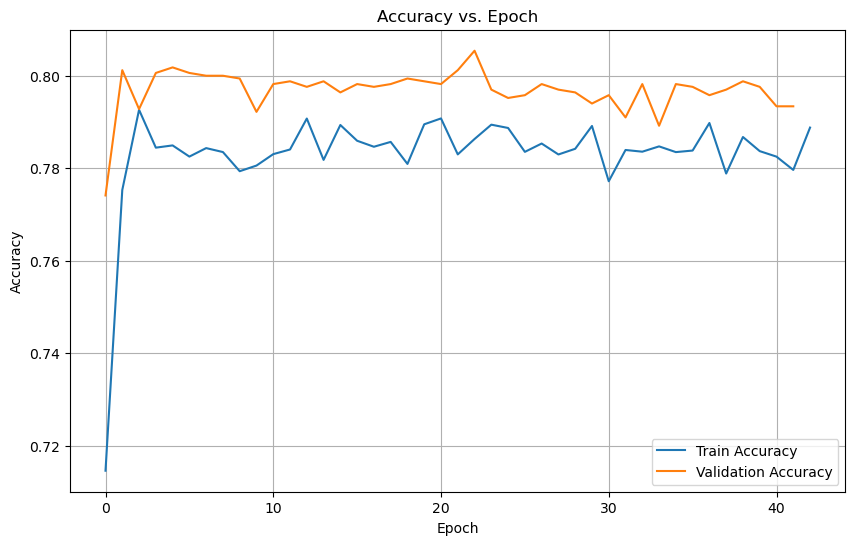

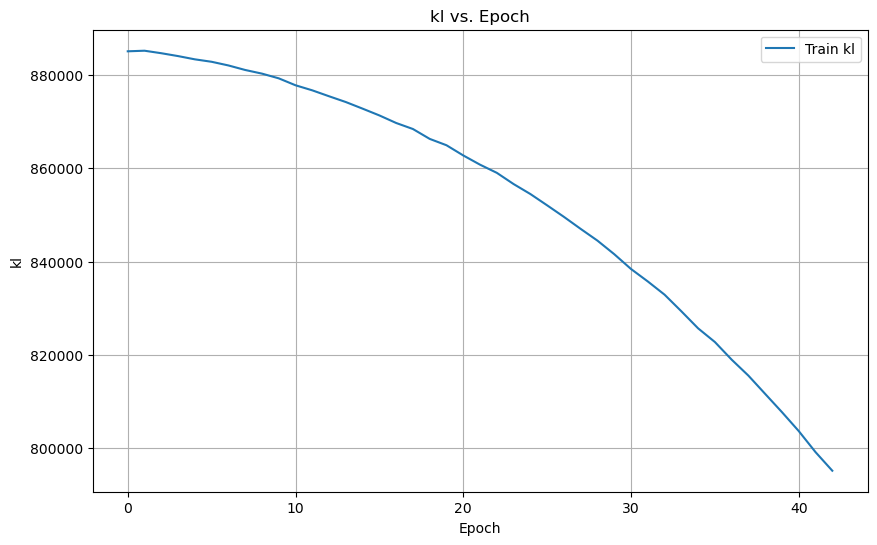

In [161]:
data80_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_1980__20250320.csv')
data80_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_1980__20250320.csv')

# 1) Group by epoch and compute the mean (or another aggregate if desired).
train_grouped = data80_train.groupby('epoch').mean()
val_grouped = data80_val.groupby('epoch').mean()

# 2) Plot Loss vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_loss'], label='Train Loss', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_loss'], label='Validation Loss', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 3) Plot Accuracy vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_acc'], label='Train Accuracy', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_acc'], label='Validation Accuracy', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_kl'], label='Train kl', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('kl')
plt.title('kl vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


data95_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_1995__20250320.csv')
data95_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_1995__20250320.csv')

data00_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_2000__20250320.csv')
data00_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_2000__20250320.csv')

data05_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_2005__20250320.csv')
data05_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_2005__20250320.csv')

data10_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_2010__20250320.csv')
data10_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_2010__20250320.csv')

data15_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_2015__20250320.csv')
data15_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_2015__20250320.csv')

data20_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_2020__20250320.csv')
data20_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_2020__20250320.csv')

In [110]:
# Create lists in the desired chronological order.
train_dfs = [
    data80_train.assign(year='1980'),
    data95_train.assign(year='1995'),
    data00_train.assign(year='2000'),
    data05_train.assign(year='2005'),
    data10_train.assign(year='2010'),
    data15_train.assign(year='2015'),
    data20_train.assign(year='2020')
]

val_dfs = [
    data80_val.assign(year='1980'),
    data95_val.assign(year='1995'),
    data00_val.assign(year='2000'),
    data05_val.assign(year='2005'),
    data10_val.assign(year='2010'),
    data15_val.assign(year='2015'),
    data20_val.assign(year='2020')
]

def assign_global_epoch(dfs):
    global_epoch_offset = 0
    dfs_with_global = []
    for df in dfs:
        df = df.copy()
        # Create a new column 'global_epoch' by adding the offset to the local epoch.
        df['global_epoch'] = df['epoch'] + global_epoch_offset
        # Increase the offset by the number of epochs in this DataFrame.
        # (Assuming epochs start at 0 so count = max(epoch) + 1.)
        global_epoch_offset += df['epoch'].max() + 1
        dfs_with_global.append(df)
    return dfs_with_global

train_dfs_offset = assign_global_epoch(train_dfs)
val_dfs_offset = assign_global_epoch(val_dfs)

# Combine all DataFrames into one.
combined_train = pd.concat(train_dfs_offset, ignore_index=True)
combined_val = pd.concat(val_dfs_offset, ignore_index=True)

train_grouped = combined_train.groupby('global_epoch').mean(numeric_only=True)
val_grouped = combined_val.groupby('global_epoch').mean(numeric_only=True)


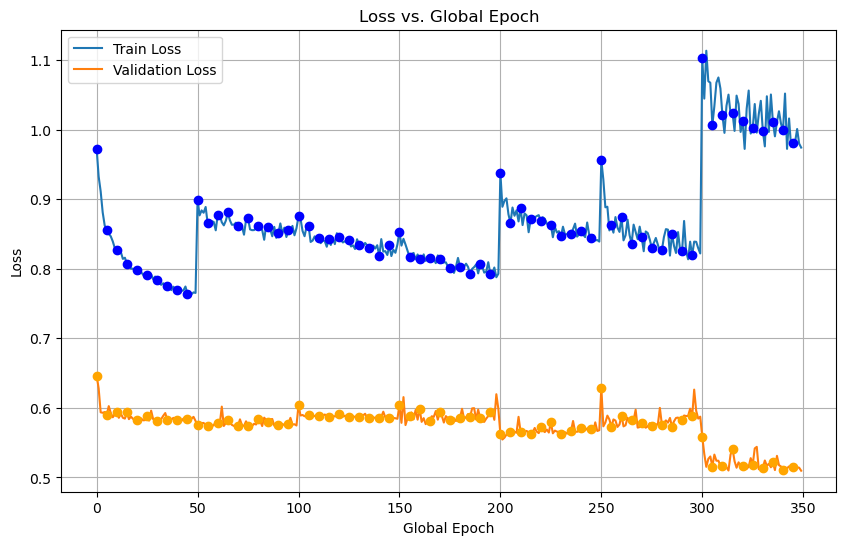

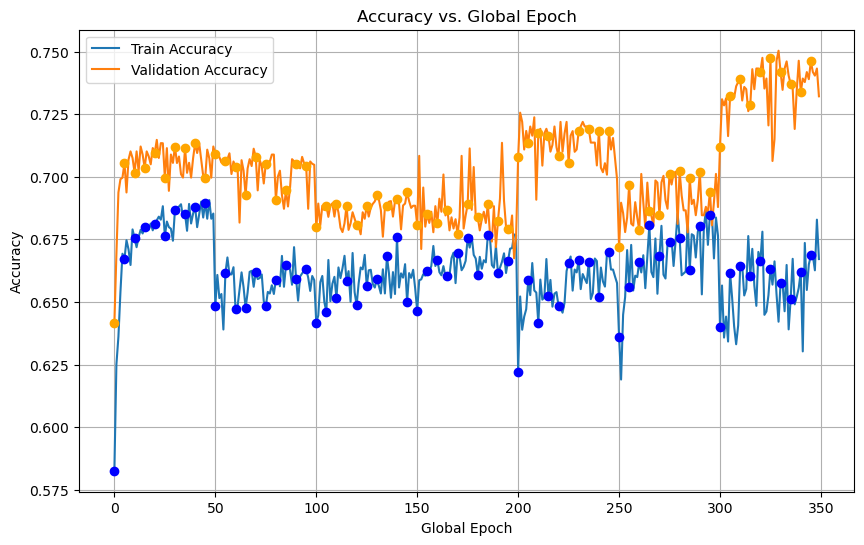

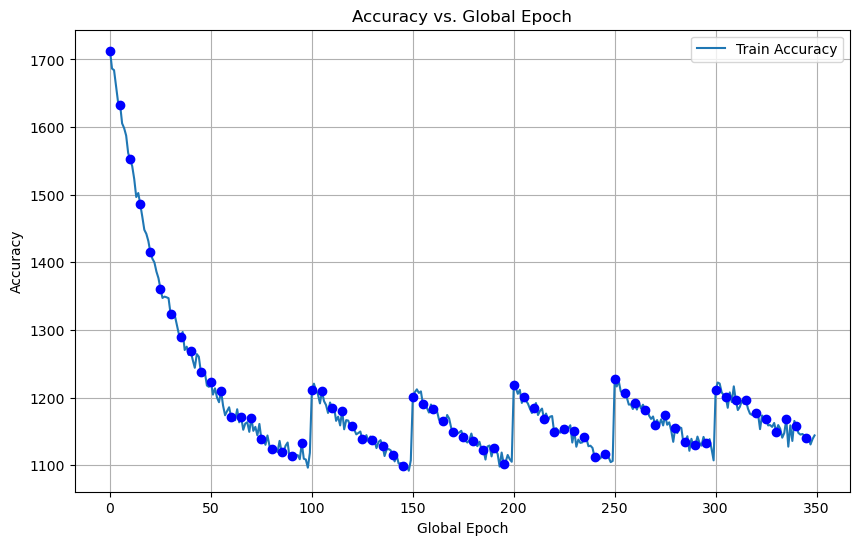

In [117]:
plt.figure(figsize=(10, 6))
# Plot the continuous line for training loss.
plt.plot(train_grouped.index, train_grouped['train_loss'], linestyle='-', label='Train Loss')
plt.plot(val_grouped.index, val_grouped['val_loss'], linestyle='-', label='Validation Loss')

# Optionally, mark every 5th epoch with a marker.
marker_every = 5
train_marker_idx = train_grouped.index[train_grouped.index % marker_every == 0]
val_marker_idx = val_grouped.index[val_grouped.index % marker_every == 0]
plt.plot(train_marker_idx, train_grouped.loc[train_marker_idx, 'train_loss'], 'o', color='blue')
plt.plot(val_marker_idx, val_grouped.loc[val_marker_idx, 'val_loss'], 'o', color='orange')

plt.xlabel('Global Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Global Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Global Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_acc'], linestyle='-', label='Train Accuracy')
plt.plot(val_grouped.index, val_grouped['val_acc'], linestyle='-', label='Validation Accuracy')

# Markers every 5 epochs
plt.plot(train_marker_idx, train_grouped.loc[train_marker_idx, 'train_acc'], 'o', color='blue')
plt.plot(val_marker_idx, val_grouped.loc[val_marker_idx, 'val_acc'], 'o', color='orange')

plt.xlabel('Global Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Global Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Global Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_kl'], linestyle='-', label='Train Accuracy')

# Markers every 5 epochs
plt.plot(train_marker_idx, train_grouped.loc[train_marker_idx, 'train_kl'], 'o', color='blue')

plt.xlabel('Global Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Global Epoch')
plt.legend()
plt.grid(True)
plt.show()

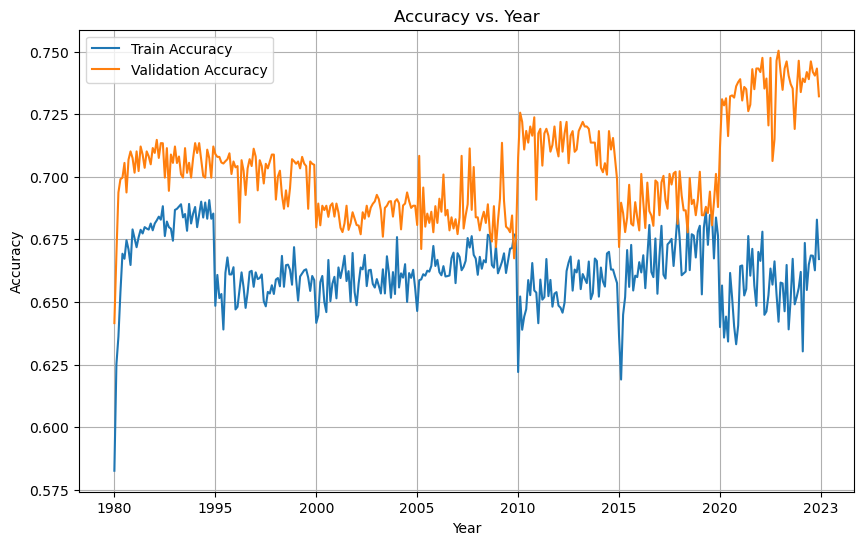

In [123]:
import matplotlib.pyplot as plt

# Suppose you already have train_grouped and val_grouped DataFrames,
# each with 'train_acc' and 'val_acc' columns indexed by global_epoch (0..350).

plt.figure(figsize=(10, 6))

# Plot lines as before (x = global_epoch, y = accuracy).
plt.plot(train_grouped.index, train_grouped['train_acc'], linestyle='-', label='Train Accuracy')
plt.plot(val_grouped.index, val_grouped['val_acc'], linestyle='-', label='Validation Accuracy')

# Manually map year -> global epoch index.
# Adjust these numbers to match your actual epoch boundaries for each interval.
year_positions = {
    1980: 0,
    1995: 50,
    2000: 100,
    2005: 150,
    2010: 200,
    2015: 250,
    2020: 300,
    2023: 350
}

# Extract the positions and labels in ascending order.
positions = list(year_positions.values())
labels    = list(year_positions.keys())

plt.xticks(positions, labels)

plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Year")
plt.legend()
plt.grid(True)
plt.show()

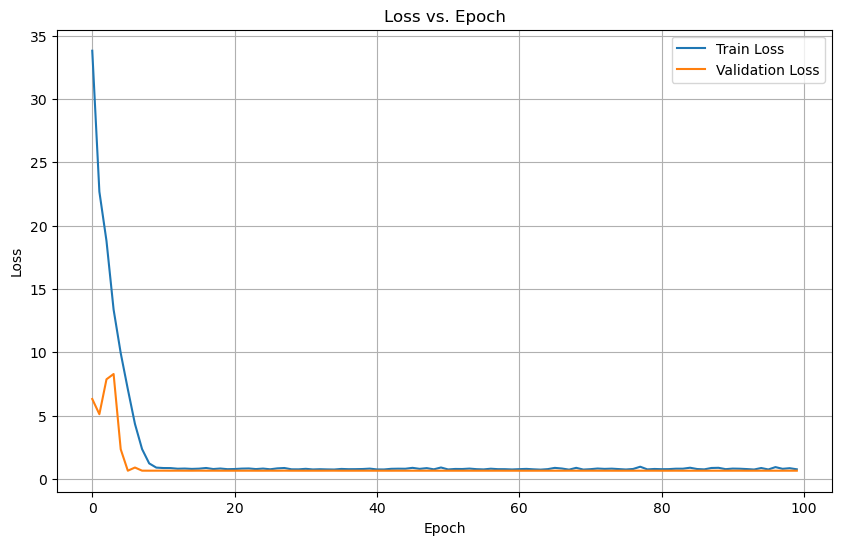

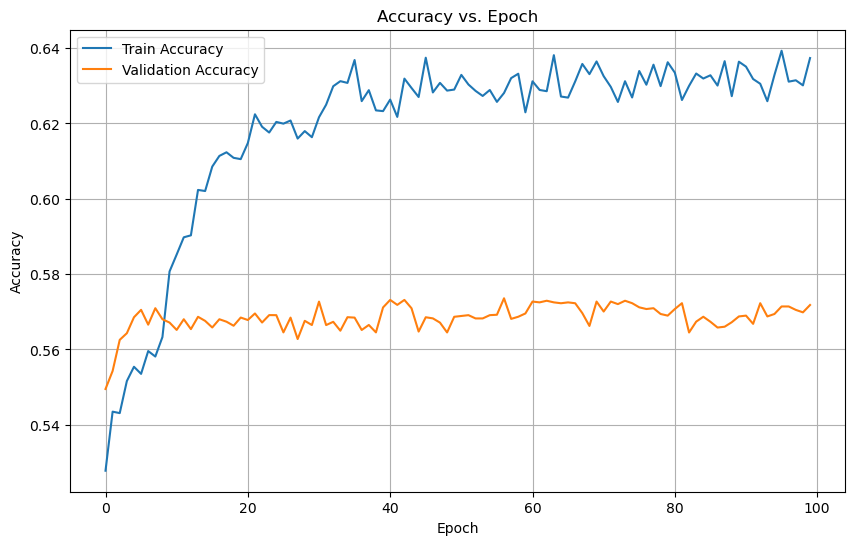

In [29]:
# 1) Group by epoch and compute the mean (or another aggregate if desired).
train_grouped = data80_train.groupby('epoch').mean()
val_grouped = data80_val.groupby('epoch').mean()

# 2) Plot Loss vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_loss'], label='Train Loss', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_loss'], label='Validation Loss', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 3) Plot Accuracy vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_acc'], label='Train Accuracy', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_acc'], label='Validation Accuracy', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


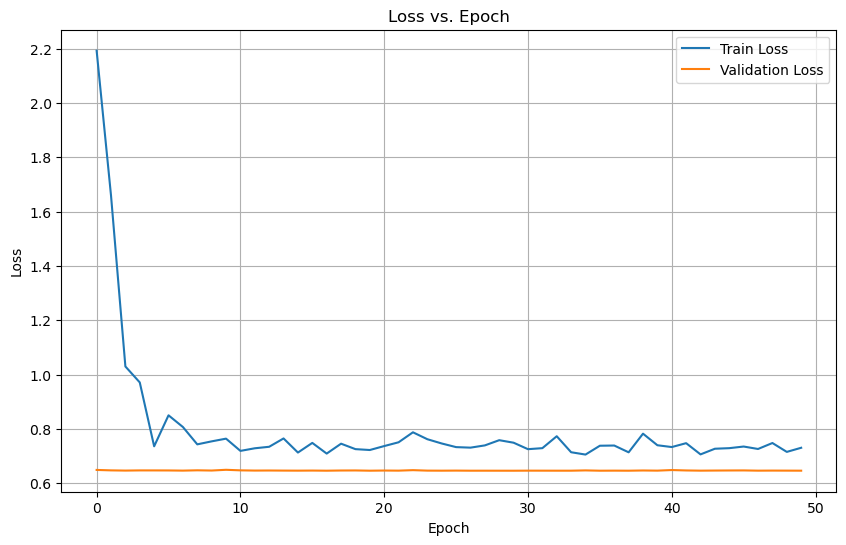

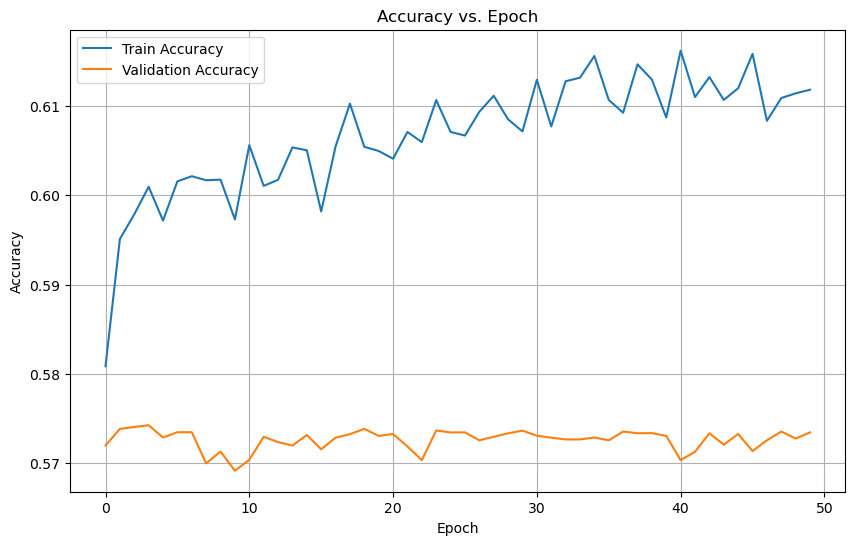

In [30]:
# 1) Group by epoch and compute the mean (or another aggregate if desired).
train_grouped = data95_train.groupby('epoch').mean()
val_grouped = data95_val.groupby('epoch').mean()

# 2) Plot Loss vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_loss'], label='Train Loss', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_loss'], label='Validation Loss', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 3) Plot Accuracy vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_acc'], label='Train Accuracy', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_acc'], label='Validation Accuracy', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


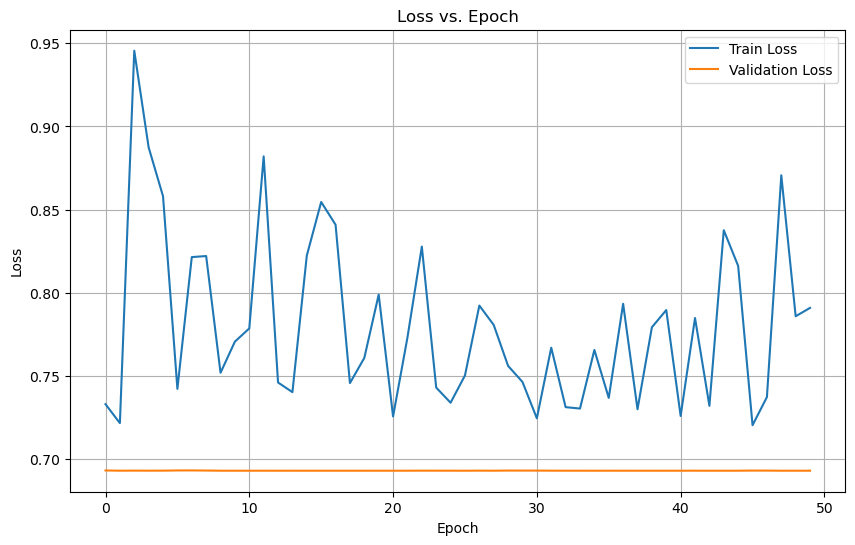

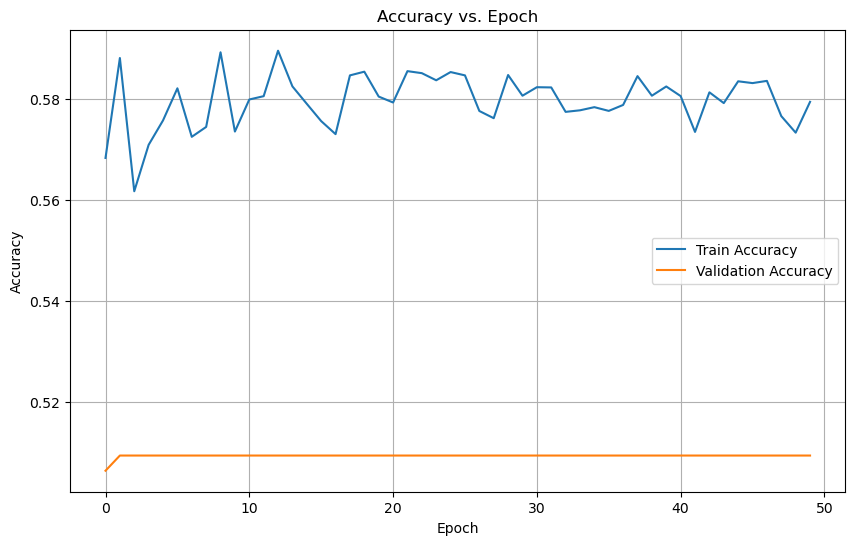

In [22]:
# 1) Group by epoch and compute the mean (or another aggregate if desired).
train_grouped = data2013_train.groupby('epoch').mean()
val_grouped = data2013_val.groupby('epoch').mean()

# 2) Plot Loss vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_loss'], label='Train Loss', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_loss'], label='Validation Loss', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 3) Plot Accuracy vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_grouped.index, train_grouped['train_acc'], label='Train Accuracy', linestyle='-')
plt.plot(val_grouped.index, val_grouped['val_acc'], label='Validation Accuracy', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

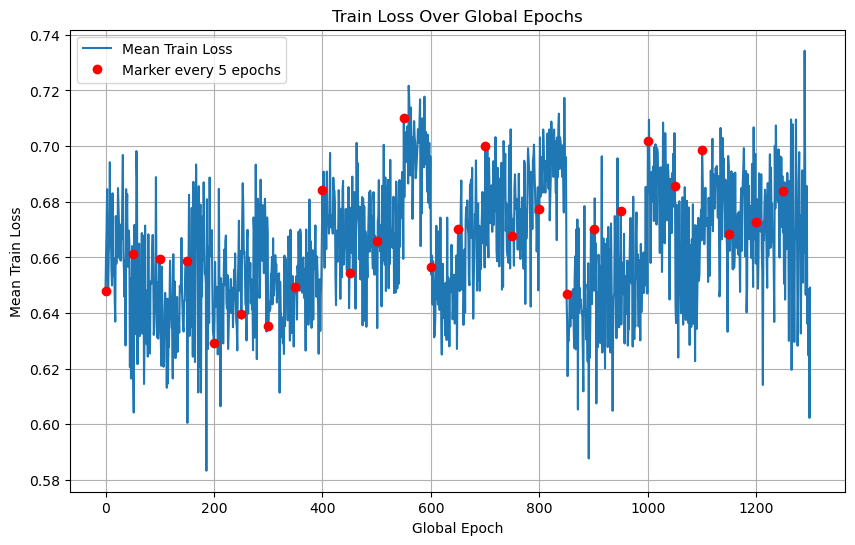

In [103]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt
import numpy as np

# 1) Load all training CSV files
metrics_dir = r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics'
pattern = os.path.join(metrics_dir, 'hmnn_metrics_train_*.csv')
csv_files = glob.glob(pattern)

dataframes = []
for file in csv_files:
    base = os.path.basename(file)
    # Regex: captures start_year, optional window info, and date string.
    match = re.match(r"hmnn_metrics_train_(\d+)_([^_]*)_(\d+)\.csv", base)
    if match:
        start_year = match.group(1)
        window_info = match.group(2)
        date_str = match.group(3)
        # When there's no window info, window_info will be an empty string.
        if window_info.strip() == "":
            interval = "initial"
        else:
            interval = window_info
    else:
        interval = "unknown"
    
    df = pd.read_csv(file)
    df['interval'] = interval
    dataframes.append(df)

data_train = pd.concat(dataframes, ignore_index=True)

# 2) Sort intervals so "initial" is first, then by earliest year in the interval
def parse_interval(interval):
    if interval == 'initial':
        return -1  # ensure "initial" is first
    try:
        # if the interval is like "1981-1995", parse the first year
        return int(interval.split('-')[0])
    except:
        return 999999  # unknown or no parse

intervals = data_train['interval'].unique()
interval_order = sorted(intervals, key=parse_interval)

# 3) For each interval in sorted order, find the max local epoch and accumulate offsets
offset = 0
interval_offset_map = {}
for iv in interval_order:
    # find the maximum epoch for rows in this interval
    sub = data_train.loc[data_train['interval'] == iv]
    if len(sub) == 0:
        continue
    max_local_epoch = sub['epoch'].max()
    # record the offset for this interval
    interval_offset_map[iv] = offset
    # increment offset by the number of epochs in this interval
    # so the next interval starts after the last epoch of the current interval
    offset += (max_local_epoch + 1)  # e.g. if local epochs go 0..99, that's 100 epochs total

# 4) Create a global_epoch column by adding the offset to the local epoch
def compute_global_epoch(row):
    return interval_offset_map[row['interval']] + row['epoch']

data_train['global_epoch'] = data_train.apply(compute_global_epoch, axis=1)

# 5) Group by the new global_epoch and compute mean train loss
global_grouped = data_train.groupby('global_epoch')['train_acc'].mean()

# Determine which global epochs are multiples of 5
marker_every = 50
marker_indices = global_grouped.index[global_grouped.index % marker_every == 0]
marker_values = global_grouped.loc[marker_indices]

# Overlay markers at those global epochs
# 6) Plot as a continuous line
plt.figure(figsize=(10, 6))
plt.plot(global_grouped.index, global_grouped.values, linestyle='-', marker=None, label='Mean Train Loss')
plt.plot(marker_indices, marker_values, 'o', color='red', markersize=6, label='Marker every 5 epochs')
plt.xlabel("Global Epoch")
plt.ylabel("Mean Train Loss")
plt.title("Train Loss Over Global Epochs")
plt.legend()
#plt.xlim(100, None)
plt.grid(True)
plt.show()

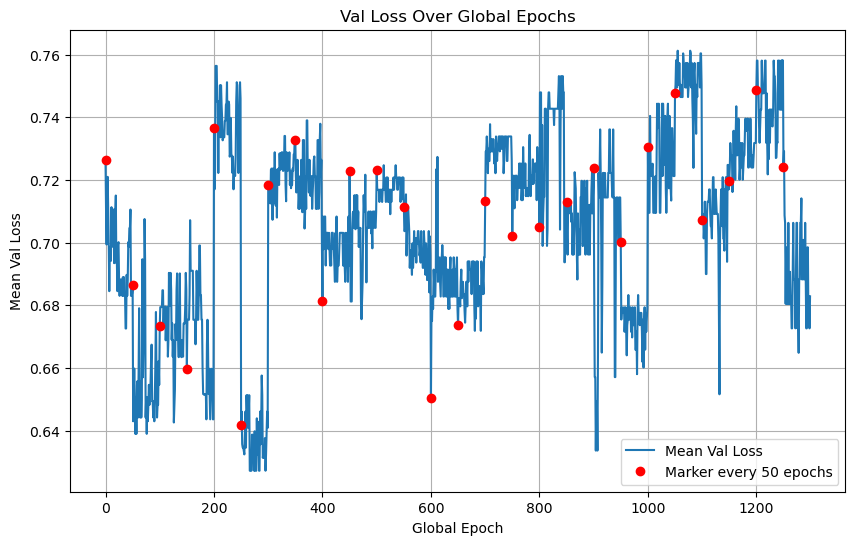

In [96]:
# 1) Load all validation CSV files
pattern_val = os.path.join(metrics_dir, 'hmnn_metrics_val_*.csv')
csv_files_val = glob.glob(pattern_val)

dataframes_val = []
for file in csv_files_val:
    base = os.path.basename(file)
    # Regex: captures start_year, optional window info (which can be empty), and date string.
    match = re.match(r"hmnn_metrics_val_(\d+)_([^_]*)_(\d+)\.csv", base)
    if match:
        start_year = match.group(1)
        window_info = match.group(2)
        date_str = match.group(3)
        # When there's no window info, window_info will be an empty string.
        if window_info.strip() == "":
            interval = "initial"
        else:
            interval = window_info
    else:
        interval = "unknown"
    
    df = pd.read_csv(file)
    df['interval'] = interval
    dataframes_val.append(df)

data_val = pd.concat(dataframes_val, ignore_index=True)

# 2) Sort intervals so "initial" is first, then by the earliest year in the interval.
def parse_interval(interval):
    if interval == 'initial':
        return -1  # ensure "initial" is first
    try:
        # if the interval is like "1981-1995", parse the first year
        return int(interval.split('-')[0])
    except:
        return 999999  # unknown or no parse

intervals_val = data_val['interval'].unique()
interval_order_val = sorted(intervals_val, key=parse_interval)

# 3) For each interval in sorted order, find the max local epoch and accumulate offsets.
offset = 0
interval_offset_map_val = {}
for iv in interval_order_val:
    sub = data_val.loc[data_val['interval'] == iv]
    if len(sub) == 0:
        continue
    max_local_epoch = sub['epoch'].max()
    interval_offset_map_val[iv] = offset
    offset += (max_local_epoch + 1)  # e.g. if local epochs go 0..99, that's 100 epochs total

# 4) Create a global_epoch column by adding the offset to the local epoch.
def compute_global_epoch_val(row):
    return interval_offset_map_val[row['interval']] + row['epoch']

data_val['global_epoch'] = data_val.apply(compute_global_epoch_val, axis=1)

# 5) Group by the new global_epoch and compute mean validation loss.
global_grouped_val = data_val.groupby('global_epoch')['val_acc'].mean()

# Determine which global epochs are multiples of 50 (or any interval you prefer for markers).
marker_every = 50
marker_indices_val = global_grouped_val.index[global_grouped_val.index % marker_every == 0]
marker_values_val = global_grouped_val.loc[marker_indices_val]

# 6) Plot the validation loss as a continuous line with markers.
plt.figure(figsize=(10, 6))
plt.plot(global_grouped_val.index, global_grouped_val.values, linestyle='-', marker=None, label='Mean Val Loss')
plt.plot(marker_indices_val, marker_values_val, 'o', color='red', markersize=6, label='Marker every 50 epochs')
plt.xlabel("Global Epoch")
plt.ylabel("Mean Val Loss")
plt.title("Val Loss Over Global Epochs")
plt.legend()
plt.grid(True)
plt.show()

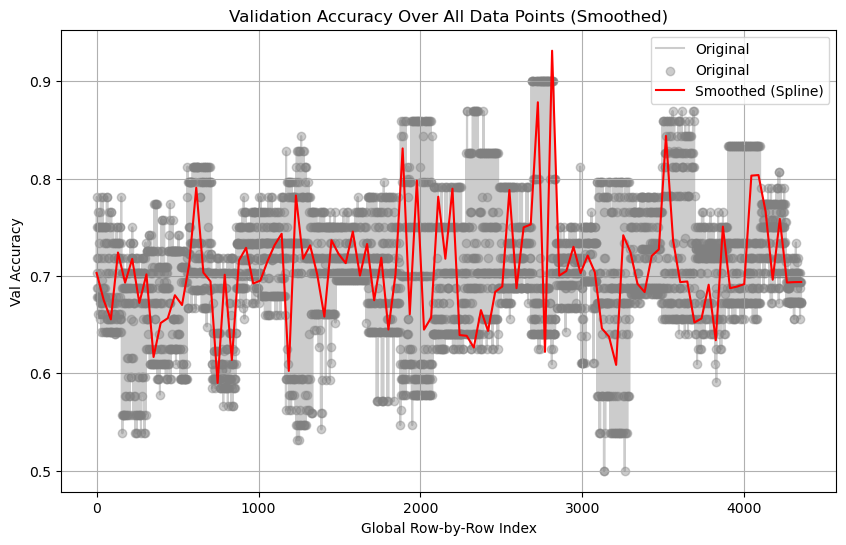

In [99]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline  # for spline smoothing

metrics_dir = r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics'
pattern_val = os.path.join(metrics_dir, 'hmnn_metrics_val_*.csv')
csv_files_val = glob.glob(pattern_val)

dataframes_val = []
for file in csv_files_val:
    base = os.path.basename(file)
    match = re.match(r"hmnn_metrics_val_(\d+)_([^_]*)_(\d+)\.csv", base)
    if match:
        start_year = match.group(1)
        window_info = match.group(2)
        date_str = match.group(3)
        interval = window_info.strip() if window_info.strip() else "initial"
    else:
        interval = "unknown"
    
    df = pd.read_csv(file)
    df['interval'] = interval
    dataframes_val.append(df)

data_val = pd.concat(dataframes_val, ignore_index=True)

def parse_interval(interval):
    if interval == 'initial':
        return -1
    try:
        return int(interval.split('-')[0])
    except:
        return 999999

intervals_val = sorted(data_val['interval'].unique(), key=parse_interval)

all_subs = []
offset = 0
for iv in intervals_val:
    sub = data_val.loc[data_val['interval'] == iv].copy()
    # Sort by epoch (or however you want to preserve the order).
    sub.sort_values(by='epoch', inplace=True)
    sub.reset_index(drop=True, inplace=True)
    
    # Create a "global_index" that increments for every row.
    sub['global_index'] = sub.index + offset
    offset += len(sub)
    
    all_subs.append(sub)

data_val_ordered = pd.concat(all_subs, ignore_index=True)

# Extract the x (global_index) and y (val_acc) arrays
x = data_val_ordered['global_index'].values
y = data_val_ordered['val_acc'].values

# --- Spline smoothing ---
# Choose how many points you want in the "smooth" version (e.g., 500).
x_smooth = np.linspace(x.min(), x.max(), 100)

# Create a spline of degree k=3 (cubic). 
# If you get errors about x not being strictly increasing,
# you might need to drop duplicates or ensure sorting is strictly ascending.
from scipy.interpolate import interp1d
spline = interp1d(x, y, kind='cubic')
y_smooth = spline(x_smooth)

# --- Plot ---
plt.figure(figsize=(10, 6))

# Plot original data as a faint line or points
plt.plot(x, y, linestyle='-', color='gray', alpha=0.4, label='Original')
plt.scatter(x, y, color='gray', alpha=0.4, label='Original')

# Plot smoothed spline in a contrasting color
plt.plot(x_smooth, y_smooth, 'r-', label='Smoothed (Spline)')

plt.xlabel("Global Row-by-Row Index")
plt.ylabel("Val Accuracy")
plt.title("Validation Accuracy Over All Data Points (Smoothed)")
plt.legend()
plt.grid(True)
plt.show()

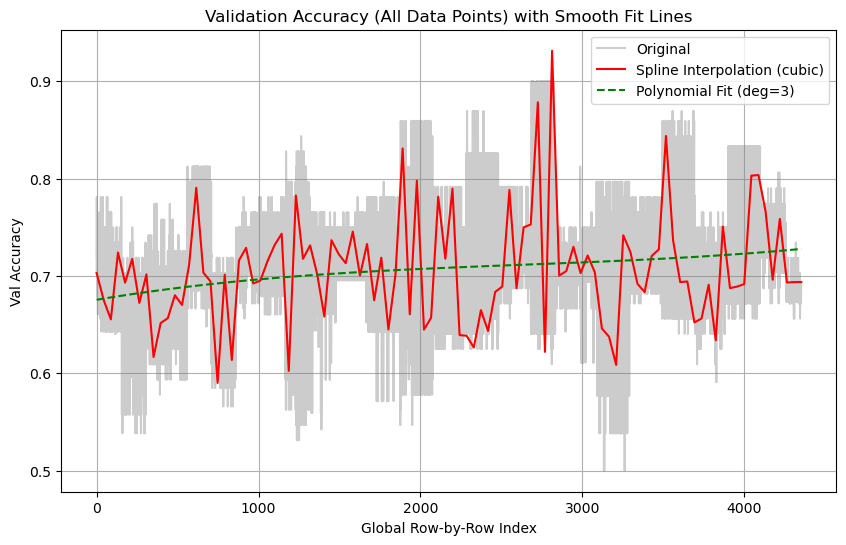

In [100]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

metrics_dir = r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics'
pattern_val = os.path.join(metrics_dir, 'hmnn_metrics_val_*.csv')
csv_files_val = glob.glob(pattern_val)

dataframes_val = []
for file in csv_files_val:
    base = os.path.basename(file)
    match = re.match(r"hmnn_metrics_val_(\d+)_([^_]*)_(\d+)\.csv", base)
    if match:
        start_year = match.group(1)
        window_info = match.group(2)
        date_str = match.group(3)
        interval = window_info.strip() if window_info.strip() else "initial"
    else:
        interval = "unknown"
    
    df = pd.read_csv(file)
    df['interval'] = interval
    dataframes_val.append(df)

data_val = pd.concat(dataframes_val, ignore_index=True)

def parse_interval(interval):
    if interval == 'initial':
        return -1
    try:
        return int(interval.split('-')[0])
    except:
        return 999999

intervals_val = sorted(data_val['interval'].unique(), key=parse_interval)

all_subs = []
offset = 0
for iv in intervals_val:
    sub = data_val.loc[data_val['interval'] == iv].copy()
    # Sort by epoch (or file order) so data is in a logical sequence.
    sub.sort_values(by='epoch', inplace=True)
    sub.reset_index(drop=True, inplace=True)
    
    # Create a row-by-row global index so every row has a unique x-value
    sub['global_index'] = sub.index + offset
    offset += len(sub)
    
    all_subs.append(sub)

data_val_ordered = pd.concat(all_subs, ignore_index=True)

# x-values (one per row) and y-values
x = data_val_ordered['global_index'].values
y = data_val_ordered['val_acc'].values

# -- 1) Spline Interpolation (interp1d or make_interp_spline) --
# This passes exactly through your data points.
x_smooth = np.linspace(x.min(), x.max(), 100)  # 100 points for the smooth curve

# Using interp1d with cubic interpolation
cubic_spline = interp1d(x, y, kind='cubic')
y_spline = cubic_spline(x_smooth)

# -- 2) Polynomial Regression (degree=3) --
# This finds a best-fit polynomial, which might not pass exactly through all points.
poly_degree = 3
coeffs = np.polyfit(x, y, deg=poly_degree)    # Fit a degree-3 polynomial
poly_func = np.poly1d(coeffs)
y_poly = poly_func(x_smooth)

# --- Plot ---
plt.figure(figsize=(10, 6))

# Original data
plt.plot(x, y, linestyle='-', color='gray', alpha=0.4, label='Original')

# Spline interpolation
plt.plot(x_smooth, y_spline, 'r-', label='Spline Interpolation (cubic)')

# Polynomial fit line
plt.plot(x_smooth, y_poly, 'g--', label=f'Polynomial Fit (deg={poly_degree})')

plt.xlabel("Global Row-by-Row Index")
plt.ylabel("Val Accuracy")
plt.title("Validation Accuracy (All Data Points) with Smooth Fit Lines")
plt.legend()
plt.grid(True)
plt.show()

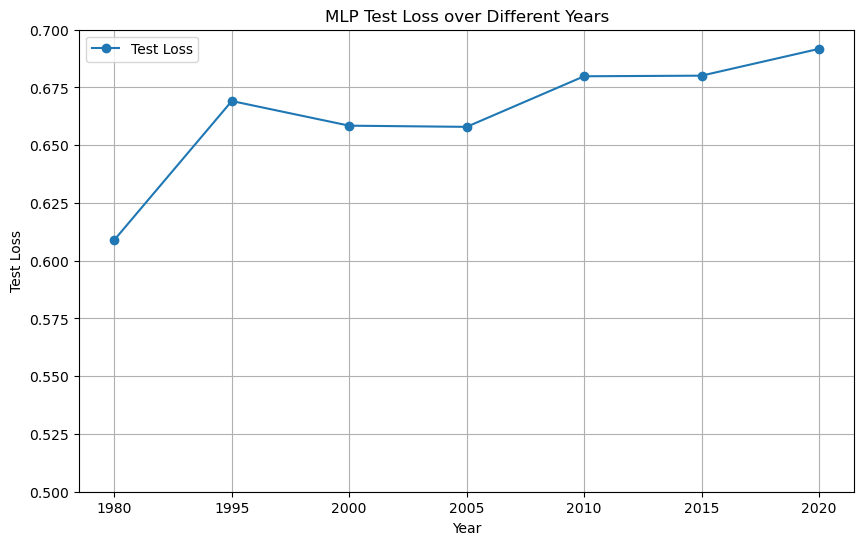

In [ ]:
import matplotlib.pyplot as plt

# Define the interval names as strings.
interval_names = ["1980", "1995", "2000", "2005", "2010", "2015", "2020"]

# Define the evaluation metrics for each interval (from your logs).
test_loss_mlp = [
    0.60903,  # year: 1980
    0.66913,  # year: 1995
    0.65846,  # year: 2000
    0.65795,  # year: 2005
    0.67985,  # year: 2010
    0.68011,  # year: 2015
    0.69171   # year: 2020
]

test_acc_mlp = [
    0.66134,   # year: 1980
    0.61957,   # year: 1995
    0.62637,   # year: 2000
    0.62037,   # year: 2005
    0.54377,   # year: 2010
    0.54884,   # year: 2015
    0.51754    # year: 2020
]

# Plotting the test loss
plt.figure(figsize=(10, 6))
plt.plot(interval_names, test_loss_mlp, marker='o', linestyle='-', label="Test Loss")
plt.xlabel("Year")
plt.ylabel("Test Loss")
plt.title("MLP Test Loss over Different Years")
plt.legend()
plt.ylim(0.5, 0.7)  # Set the y-axis limits to focus on the differences
plt.grid(True)
plt.show()

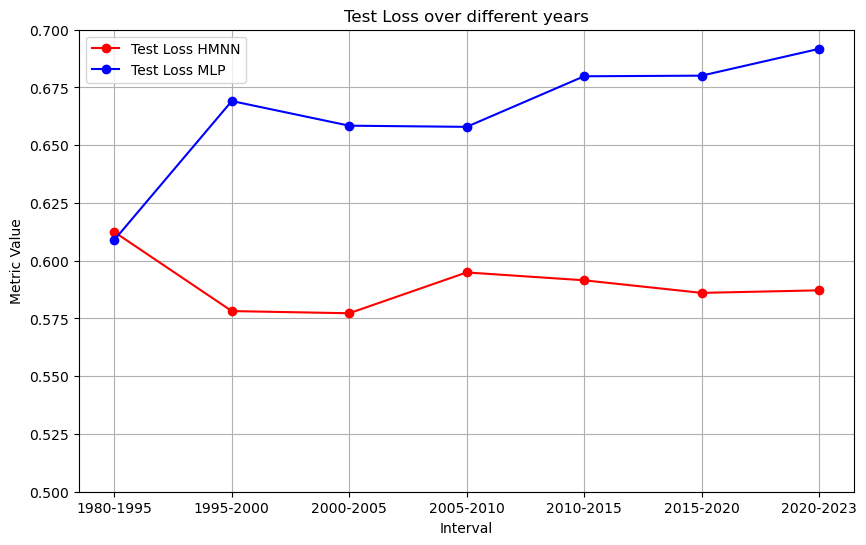

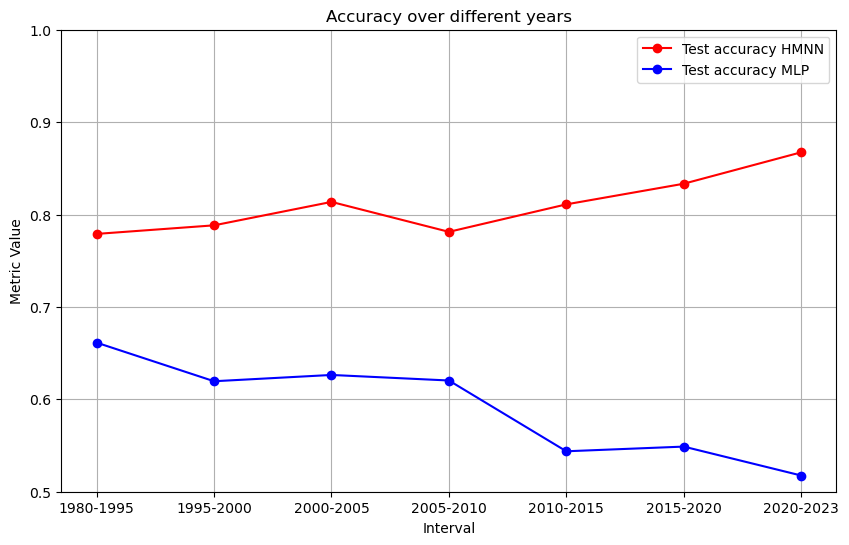

In [163]:
import matplotlib.pyplot as plt

# Define the interval names as strings.
interval_names = ["1980-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015", "2015-2020", "2020-2023"]

# Define the evaluation metrics for each interval (from your logs).
test_acc_hmnn = [
    0.77902,  # initial model: 1980-1995
    0.78830,  # updated model: 1995-2000
    0.81365,  # updated model: 2000-2005
    0.78125,  # updated model: 2005-2010
    0.81100,  # updated model: 2010-2015
    0.83333,  # updated model: 2015-2020
    0.86734   # updated model: 2020-2023
]

test_loss_hmnn = [
    0.61242,  # initial model: 1980-1995
    0.57820,  # updated model: 1995-2000
    0.57726,  # updated model: 2000-2005
    0.59493,  # updated model: 2005-2010
    0.59153,  # updated model: 2010-2015
    0.58608,  # updated model: 2015-2020
    0.58718   # updated model: 2020-2023
]

plt.figure(figsize=(10,6))
plt.plot(interval_names, test_loss_hmnn, marker='o', linestyle='-', label="Test Loss HMNN", color='red')
plt.plot(interval_names, test_loss_mlp, marker='o', linestyle='-', label="Test Loss MLP", color='blue')
#plt.plot(interval_names, test_loss, marker='o', linestyle='-', label="Test Loss")
plt.xlabel("Interval")
plt.ylabel("Metric Value")
plt.title("Test Loss over different years")
plt.legend()
plt.ylim(0.5, 0.7)  # Set the y-axis limits to focus on the differences
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(interval_names, test_acc_hmnn, marker='o', linestyle='-', label="Test accuracy HMNN", color='red')
plt.plot(interval_names, test_acc_mlp, marker='o', linestyle='-', label="Test accuracy MLP", color='blue')
#plt.plot(interval_names, test_loss, marker='o', linestyle='-', label="Test Loss")
plt.xlabel("Interval")
plt.ylabel("Metric Value")
plt.title("Accuracy over different years")
plt.legend()
plt.ylim(0.5, 1.0)  # Set the y-axis limits to focus on the differences
plt.grid(True)
plt.show()

### Actual Results

In [185]:
import matplotlib

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-v0_8-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)

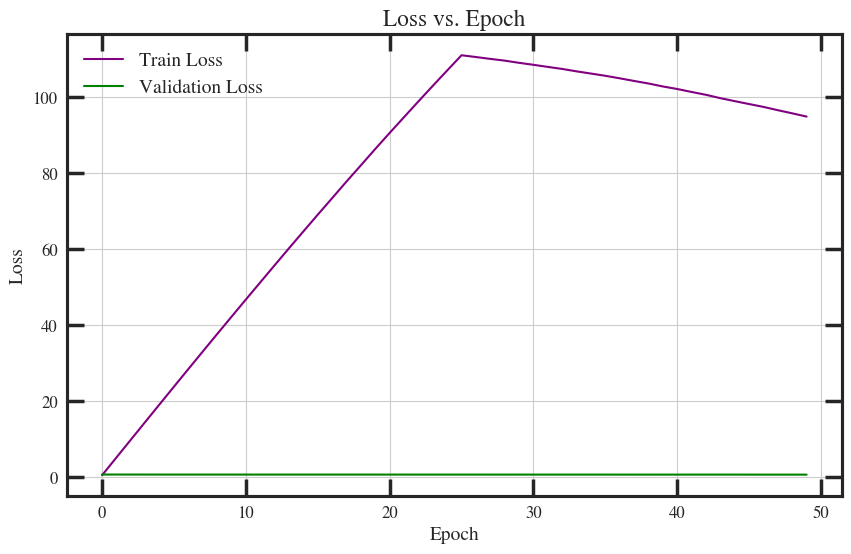

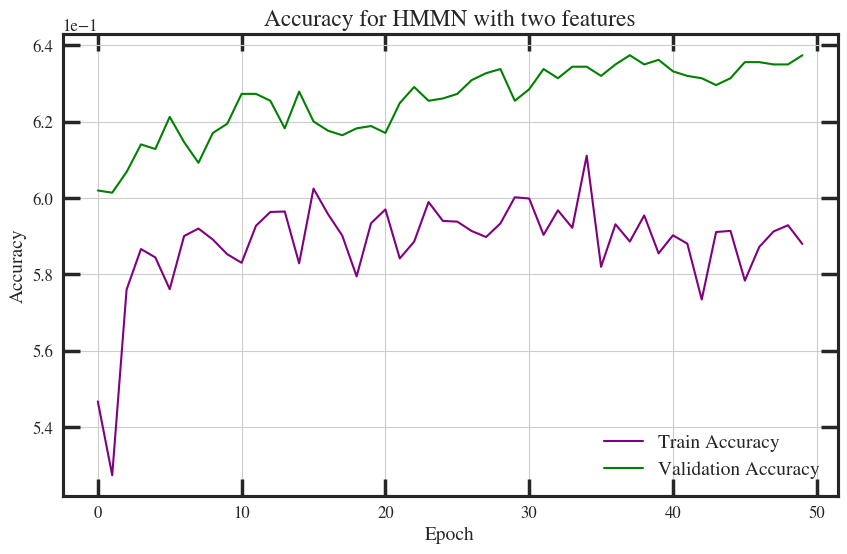

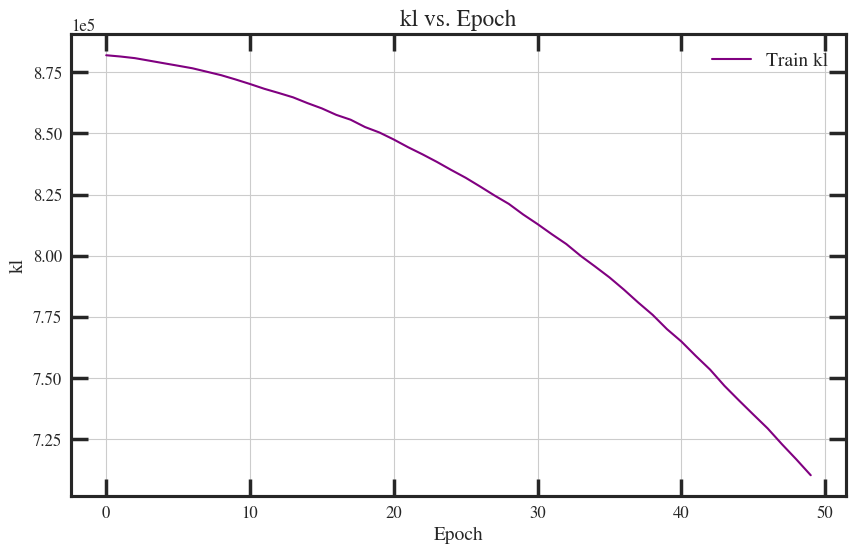

In [193]:
data80_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_val_1980__20250321.csv')
data80_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\metrics\hmnn_metrics_train_1980__20250321.csv')

# 1) Group by epoch and compute the mean (or another aggregate if desired).
train_grouped = data80_train.groupby('epoch').mean()
val_grouped = data80_val.groupby('epoch').mean()

# Reset the style before plotting
reset_plt(ticksize=12, fontsize=14)

# 2) Plot Loss vs. Epoch with purple (train) and green (validation)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_grouped.index, train_grouped['train_loss'], label='Train Loss', linestyle='-', color='purple')
ax.plot(val_grouped.index, val_grouped['val_loss'], label='Validation Loss', linestyle='-', color='green')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss vs. Epoch')
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# 3) Plot Accuracy vs. Epoch with purple (train) and green (validation)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_grouped.index, train_grouped['train_acc'], label='Train Accuracy', linestyle='-', color='purple')
ax.plot(val_grouped.index, val_grouped['val_acc'], label='Validation Accuracy', linestyle='-', color='green')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for HMMN with two features')
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# Plot kl vs. Epoch (only one line in purple)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_grouped.index, train_grouped['train_kl'], label='Train kl', linestyle='-', color='purple')
ax.set_xlabel('Epoch')
ax.set_ylabel('kl')
ax.set_title('kl vs. Epoch')
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

In [194]:
import matplotlib.pyplot as plt

# Define the interval names as strings.
interval_names = [
    "1980-1994",
    "1995-2000",
    "2000-2005",
    "2005-2010",
    "2010-2015",
    "2015-2020",
    "2020-2023"
]

# Evaluation metrics from your logs.
test_loss_mlp = [
    0.7385991215705872,  # 1980-1994
    2.7225136756896973,  # 1995-2000
    2.8366687297821045,  # 2000-2005
    4.061694622039795,   # 2005-2010
    6.578320503234863,   # 2010-2015
    17.74161720275879,   # 2015-2020
    34.474029541015625   # 2020-2023
]

test_acc_mlp = [
    0.6865301132202148,  # 1980-1994
    0.6492753624916077,  # 1995-2000
    0.6294013857841492,  # 2000-2005
    0.6433621644973755,  # 2005-2010
    0.6279733777046204,  # 2010-2015
    0.6235707998275757,  # 2015-2020
    0.5422740578651428   # 2020-2023
]

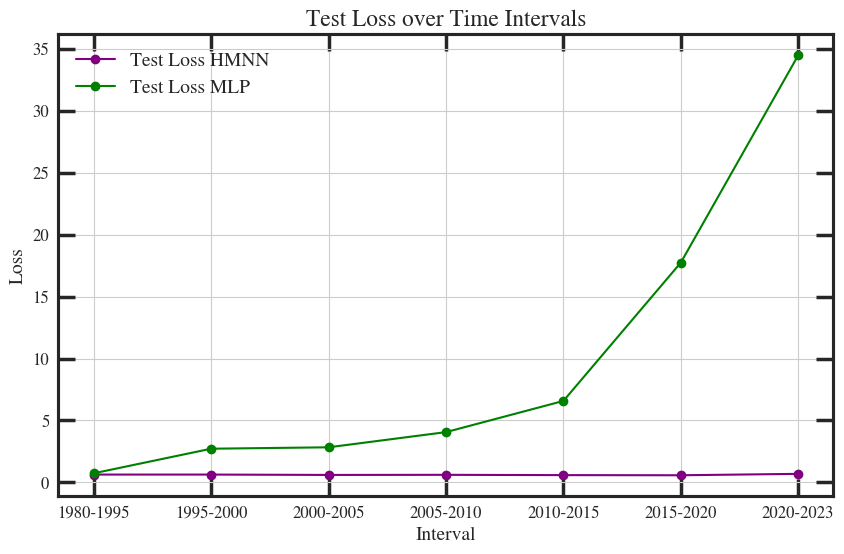

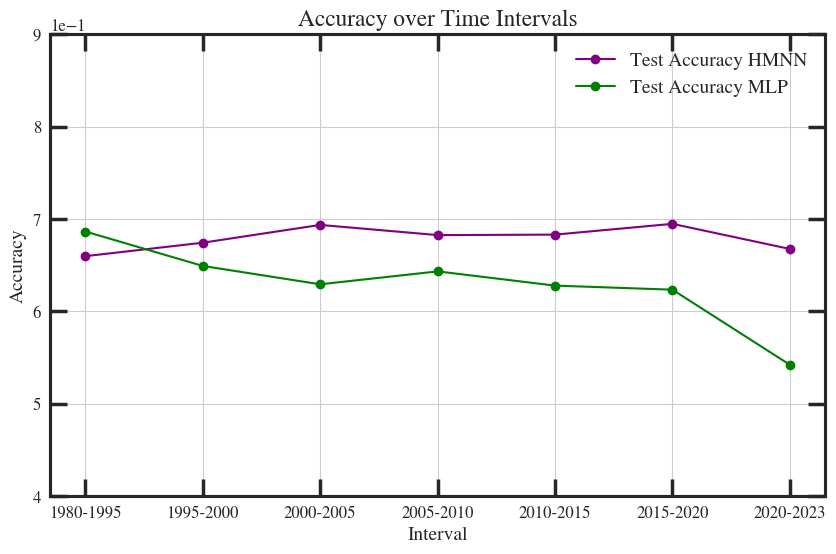

In [207]:
# Define the interval names as strings.
interval_names = ["1980-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015", "2015-2020", "2020-2023"]

# Updated evaluation metrics based on your logs.
test_acc_hmnn = [
    0.65984,  # 1980-1994 (mapped to "1980-1995")
    0.67440,  # 1995-2000
    0.69366,  # 2000-2005
    0.68264,  # 2005-2010
    0.68316,  # 2010-2015
    0.69481,  # 2015-2020
    0.66764   # 2020-2023
]

test_loss_hmnn = [
    0.63610,  # 1980-1994 (mapped to "1980-1995")
    0.63598,  # 1995-2000
    0.60674,  # 2000-2005
    0.61550,  # 2005-2010
    0.59164,  # 2010-2015
    0.58026,  # 2015-2020
    0.69383   # 2020-2023
]

# Evaluation metrics from your logs.
test_loss_mlp = [
    0.7385991215705872,  # 1980-1994
    2.7225136756896973,  # 1995-2000
    2.8366687297821045,  # 2000-2005
    4.061694622039795,   # 2005-2010
    6.578320503234863,   # 2010-2015
    17.74161720275879,   # 2015-2020
    34.474029541015625   # 2020-2023
]

test_acc_mlp = [
    0.6865301132202148,  # 1980-1994
    0.6492753624916077,  # 1995-2000
    0.6294013857841492,  # 2000-2005
    0.6433621644973755,  # 2005-2010
    0.6279733777046204,  # 2010-2015
    0.6235707998275757,  # 2015-2020
    0.5422740578651428   # 2020-2023
]

# Reset the style before plotting
reset_plt(ticksize=12, fontsize=14)

# Plot Test Loss with default colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(interval_names, test_loss_hmnn, marker='o', linestyle='-', label="Test Loss HMNN", color='purple')
ax.plot(interval_names, test_loss_mlp, marker='o', linestyle='-', label="Test Loss MLP", color='green')
ax.set_xlabel("Interval")
ax.set_ylabel("Loss")
ax.set_title("Test Loss over Time Intervals")
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# Plot Test Accuracy with default colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(interval_names, test_acc_hmnn, marker='o', linestyle='-', label="Test Accuracy HMNN", color='purple')
ax.plot(interval_names, test_acc_mlp, marker='o', linestyle='-', label="Test Accuracy MLP", color='green')
ax.set_xlabel("Interval")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy over Time Intervals")
ax.legend()
ax.set_ylim(0.4, 0.9)
ax.grid(True)
put_ticks(fig, ax)
plt.show()

### more plots

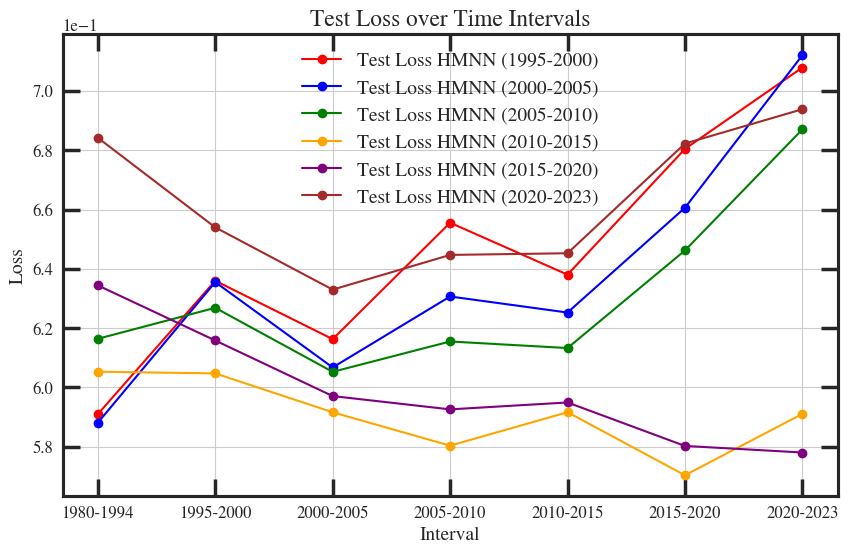

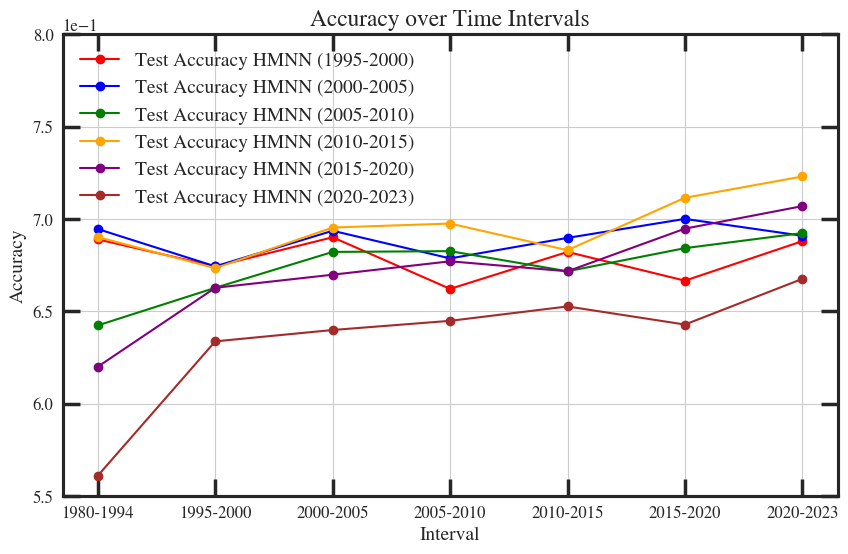

In [214]:
# Define the interval names as strings.
interval_names = [
    "1980-1994",
    "1995-2000",
    "2000-2005",
    "2005-2010",
    "2010-2015",
    "2015-2020",
    "2020-2023"
]

# Updated evaluation metrics from your latest logs.
test_loss_1995 = [
    0.5909895300865173,  # 1980-1994
    0.6359793543815613,  # 1995-2000
    0.6162853240966797,  # 2000-2005
    0.6555569767951965,  # 2005-2010
    0.6380358934402466,  # 2010-2015
    0.6804380416870117,  # 2015-2020
    0.7079033255577087   # 2020-2023
]

test_acc_1995 = [
    0.6890130639076233,  # 1980-1994
    0.6743961572647095,  # 1995-2000
    0.6901408433914185,  # 2000-2005
    0.6622152328491211,  # 2005-2010
    0.6822074055671692,  # 2010-2015
    0.6666666865348816,  # 2015-2020
    0.6880466341972351   # 2020-2023
]

# Updated evaluation metrics from your latest logs.
test_loss_2000 = [
    0.5880900025367737,  # 1980-1994
    0.6355195641517639,  # 1995-2000
    0.6067404747009277,  # 2000-2005
    0.6306748986244202,  # 2005-2010
    0.6252620220184326,  # 2010-2015
    0.6605983376502991,  # 2015-2020
    0.7120363712310791   # 2020-2023
]

test_acc_2000 = [
    0.6945996284484863,  # 1980-1994
    0.6743961572647095,  # 1995-2000
    0.6936619877815247,  # 2000-2005
    0.6787117123603821,  # 2005-2010
    0.6898192167282104,  # 2010-2015
    0.7000879645347595,  # 2015-2020
    0.6909620761871338   # 2020-2023
]

test_loss_2005 = [
    0.6164039969444275,  # 1980-1994
    0.6268580555915833,  # 1995-2000
    0.6052581667900085,  # 2000-2005
    0.6154983639717102,  # 2005-2010
    0.6132822036743164,  # 2010-2015
    0.6461958289146423,  # 2015-2020
    0.6870333552360535   # 2020-2023
]

test_acc_2005 = [
    0.6424580812454224,  # 1980-1994
    0.6628019213676453,  # 1995-2000
    0.6822183132171631,  # 2000-2005
    0.6826394200325012,  # 2005-2010
    0.6717411875724792,  # 2010-2015
    0.6842567920684814,  # 2015-2020
    0.6924198269844055   # 2020-2023
]

test_loss_2010 = [
    0.6053056716918945,  # 1980-1994
    0.6047363877296448,  # 1995-2000
    0.5916213989257812,  # 2000-2005
    0.5803616046905518,  # 2005-2010
    0.5916410088539124,  # 2010-2015
    0.5703759789466858,  # 2015-2020
    0.5910870432853699   # 2020-2023
]

test_acc_2010 = [
    0.6902545094490051,  # 1980-1994
    0.6734299659729004,  # 1995-2000
    0.6954225301742554,  # 2000-2005
    0.6975647807121277,  # 2005-2010
    0.6831588745117188,  # 2010-2015
    0.711521565914154,   # 2015-2020
    0.7230320572853088   # 2020-2023
]

test_loss_2015 = [
    0.6344232559204102,  # 1980-1994
    0.6158308386802673,  # 1995-2000
    0.5970829129219055,  # 2000-2005
    0.5925990343093872,  # 2005-2010
    0.5949324369430542,  # 2010-2015
    0.5802639126777649,  # 2015-2020
    0.5780503153800964   # 2020-2023
]

test_acc_2015 = [
    0.6201117038726807,  # 1980-1994
    0.6628019213676453,  # 1995-2000
    0.6698943376541138,  # 2000-2005
    0.6771405935287476,  # 2005-2010
    0.6717411875724792,  # 2010-2015
    0.6948109269142151,  # 2015-2020
    0.7069970965385437   # 2020-2023
]

test_loss_2020 = [
    0.6842062473297119,  # 1980-1994
    0.6539808511734009,  # 1995-2000
    0.6329870820045471,  # 2000-2005
    0.6446917057037354,  # 2005-2010
    0.6452593803405762,  # 2010-2015
    0.6822544932365417,  # 2015-2020
    0.6938309073448181   # 2020-2023
]

test_acc_2020 = [
    0.5611421465873718,  # 1980-1994
    0.6338164210319519,  # 1995-2000
    0.639964759349823,   # 2000-2005
    0.6449332237243652,  # 2005-2010
    0.6527116894721985,  # 2010-2015
    0.6429199576377869,  # 2015-2020
    0.6676384806632996   # 2020-2023
]

# Set the plotting style
reset_plt(ticksize=12, fontsize=14)

# Plot Test Loss using ax and the provided colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(interval_names, test_loss_1995, marker='o', linestyle='-', label="Test Loss HMNN (1995-2000)", color='red')
ax.plot(interval_names, test_loss_2000, marker='o', linestyle='-', label="Test Loss HMNN (2000-2005)", color='blue')
ax.plot(interval_names, test_loss_2005, marker='o', linestyle='-', label="Test Loss HMNN (2005-2010)", color='green')
ax.plot(interval_names, test_loss_2010, marker='o', linestyle='-', label="Test Loss HMNN (2010-2015)", color='orange')
ax.plot(interval_names, test_loss_2015, marker='o', linestyle='-', label="Test Loss HMNN (2015-2020)", color='purple')
ax.plot(interval_names, test_loss_2020, marker='o', linestyle='-', label="Test Loss HMNN (2020-2023)", color='brown')
ax.set_xlabel("Interval")
ax.set_ylabel("Loss")
ax.set_title("Test Loss over Time Intervals")
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# Plot Test Accuracy using ax and the provided colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(interval_names, test_acc_1995, marker='o', linestyle='-', label="Test Accuracy HMNN (1995-2000)", color='red')
ax.plot(interval_names, test_acc_2000, marker='o', linestyle='-', label="Test Accuracy HMNN (2000-2005)", color='blue')
ax.plot(interval_names, test_acc_2005, marker='o', linestyle='-', label="Test Accuracy HMNN (2005-2010)", color='green')
ax.plot(interval_names, test_acc_2010, marker='o', linestyle='-', label="Test Accuracy HMNN (2010-2015)", color='orange')
ax.plot(interval_names, test_acc_2015, marker='o', linestyle='-', label="Test Accuracy HMNN (2015-2020)", color='purple')
ax.plot(interval_names, test_acc_2020, marker='o', linestyle='-', label="Test Accuracy HMNN (2020-2023)", color='brown')
ax.set_xlabel("Interval")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy over Time Intervals")
ax.legend()
ax.set_ylim(0.55, 0.8)
ax.grid(True)
put_ticks(fig, ax)
plt.show()

In [201]:
data80_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_1980__20250321.csv')
data80_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_1980__20250321.csv')

data95_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_1995__20250321.csv')
data95_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_1995__20250321.csv')

data00_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_2000__20250321.csv')
data00_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_2000__20250321.csv')

data05_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_2005__20250321.csv')
data05_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_2005__20250321.csv')

data10_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_2010__20250321.csv')
data10_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_2010__20250321.csv')

data15_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_2015__20250321.csv')
data15_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_2015__20250321.csv')

data20_val = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_val_2020__20250321.csv')
data20_train = pd.read_csv(r'C:\Users\Jonat\Hidden_Markov_Miracles\Old results\Great results\hmnn_metrics_train_2020__20250321.csv')



In [202]:
# Create lists in the desired chronological order.
train_dfs = [
    data80_train.assign(year='1980'),
    data95_train.assign(year='1995'),
    data00_train.assign(year='2000'),
    data05_train.assign(year='2005'),
    data10_train.assign(year='2010'),
    data15_train.assign(year='2015'),
    data20_train.assign(year='2020')
]

val_dfs = [
    data80_val.assign(year='1980'),
    data95_val.assign(year='1995'),
    data00_val.assign(year='2000'),
    data05_val.assign(year='2005'),
    data10_val.assign(year='2010'),
    data15_val.assign(year='2015'),
    data20_val.assign(year='2020')
]

def assign_global_epoch(dfs):
    global_epoch_offset = 0
    dfs_with_global = []
    for df in dfs:
        df = df.copy()
        # Create a new column 'global_epoch' by adding the offset to the local epoch.
        df['global_epoch'] = df['epoch'] + global_epoch_offset
        # Increase the offset by the number of epochs in this DataFrame.
        # (Assuming epochs start at 0 so count = max(epoch) + 1.)
        global_epoch_offset += df['epoch'].max() + 1
        dfs_with_global.append(df)
    return dfs_with_global

train_dfs_offset = assign_global_epoch(train_dfs)
val_dfs_offset = assign_global_epoch(val_dfs)

# Combine all DataFrames into one.
combined_train = pd.concat(train_dfs_offset, ignore_index=True)
combined_val = pd.concat(val_dfs_offset, ignore_index=True)

train_grouped = combined_train.groupby('global_epoch').mean(numeric_only=True)
val_grouped = combined_val.groupby('global_epoch').mean(numeric_only=True)


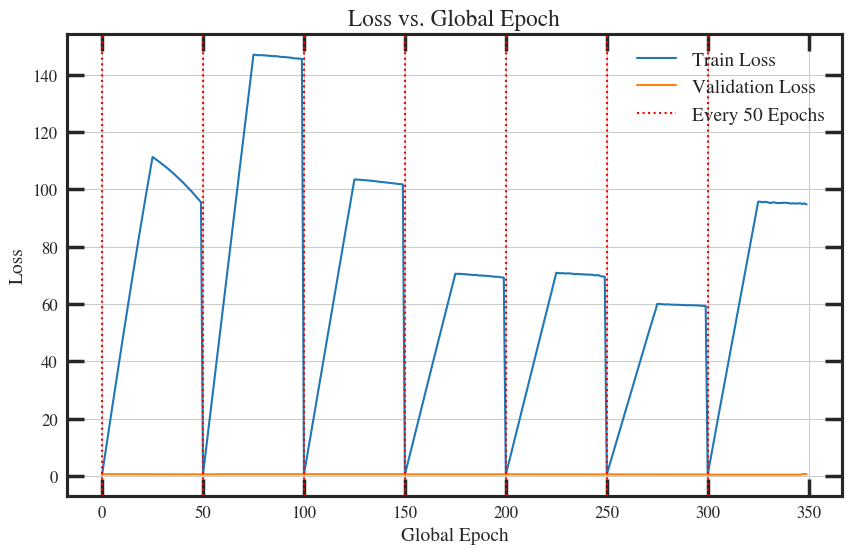

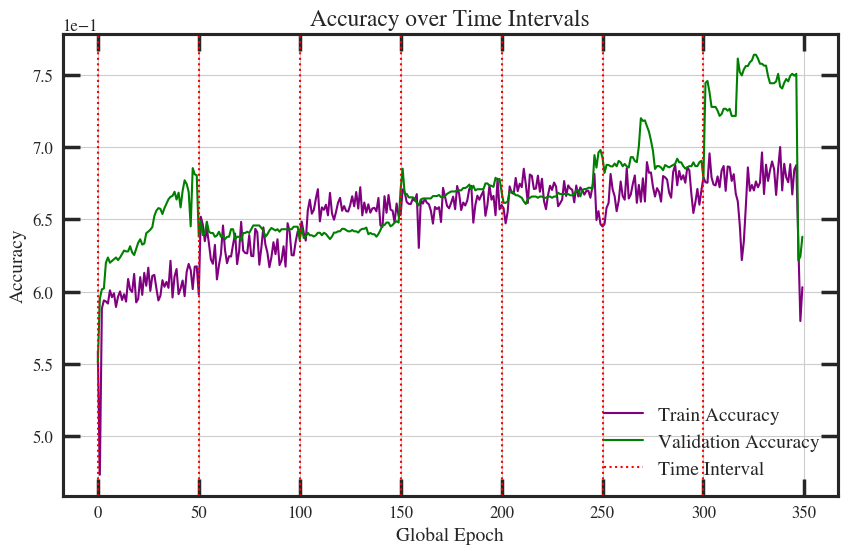

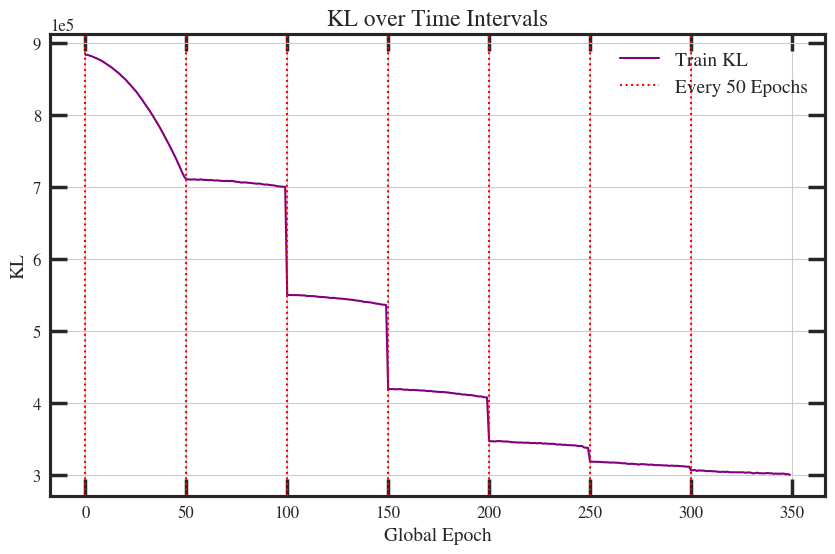

In [215]:
# Set the plotting style
reset_plt(ticksize=12, fontsize=14)

# Determine vertical line positions (every 50 epochs)
marker_every = 50
vertical_positions = train_grouped.index[train_grouped.index % marker_every == 0]

# ---------------------------
# Plot 1: Loss vs. Global Epoch
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 6))
# Continuous lines for train and validation loss
ax.plot(train_grouped.index, train_grouped['train_loss'], linestyle='-', label='Train Loss')
ax.plot(val_grouped.index, val_grouped['val_loss'], linestyle='-', label='Validation Loss')
# Add a red dotted vertical line at every 50 epochs
for i, x in enumerate(vertical_positions):
    if i == 0:
        ax.axvline(x=x, linestyle=':', color='red', label='Every 50 Epochs')
    else:
        ax.axvline(x=x, linestyle=':', color='red')
ax.set_xlabel('Global Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss vs. Global Epoch')
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# ---------------------------
# Plot 2: Accuracy vs. Global Epoch
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 6))
# Continuous lines for train and validation accuracy
ax.plot(train_grouped.index, train_grouped['train_acc'], linestyle='-', label='Train Accuracy', color='purple')
ax.plot(val_grouped.index, val_grouped['val_acc'], linestyle='-', label='Validation Accuracy', color='green')
# Add a red dotted vertical line at every 50 epochs
for i, x in enumerate(vertical_positions):
    if i == 0:
        ax.axvline(x=x, linestyle=':', color='red', label='Time Interval')
    else:
        ax.axvline(x=x, linestyle=':', color='red')
ax.set_xlabel('Global Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy over Time Intervals')
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# ---------------------------
# Plot 3: KL vs. Global Epoch (Train only)
# ---------------------------
fig, ax = plt.subplots(figsize=(10, 6))
# Continuous line for train KL
ax.plot(train_grouped.index, train_grouped['train_kl'], linestyle='-', label='Train KL', color='purple')
# Add a red dotted vertical line at every 50 epochs
for i, x in enumerate(vertical_positions):
    if i == 0:
        ax.axvline(x=x, linestyle=':', color='red', label='Every 50 Epochs')
    else:
        ax.axvline(x=x, linestyle=':', color='red')
ax.set_xlabel('Global Epoch')
ax.set_ylabel('KL')
ax.set_title('KL over Time Intervals')
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

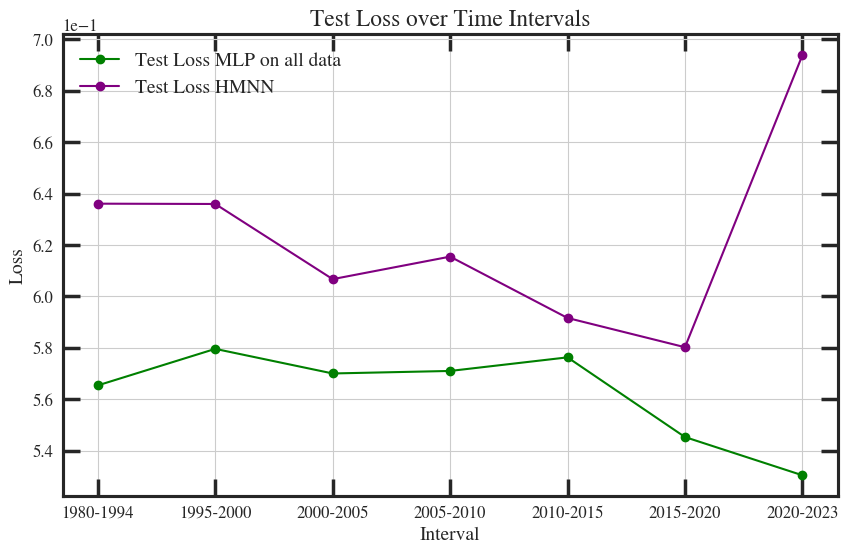

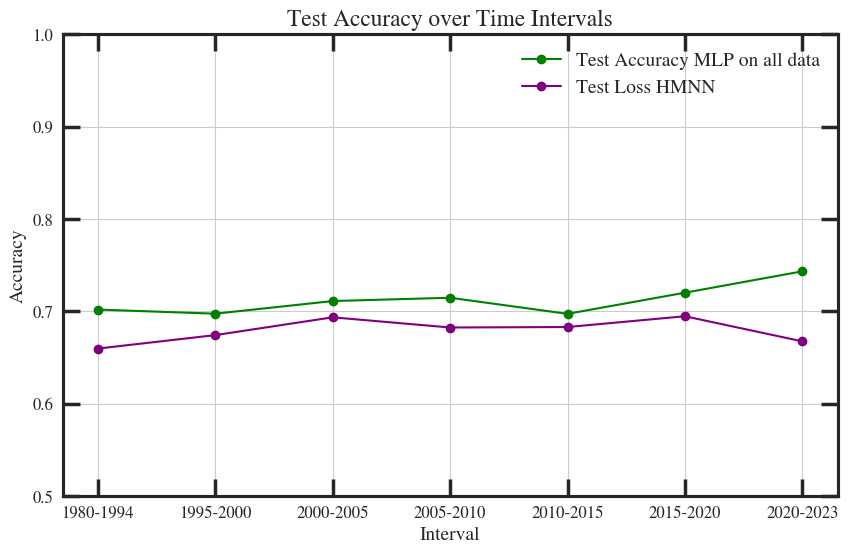

In [217]:
# Test loss and accuracy values from your logs.
test_loss_nn = [
    0.5654163360595703,  # 1980-1994
    0.5796166658401489,  # 1995-2000
    0.5700508952140808,  # 2000-2005
    0.5710298418998718,  # 2005-2010
    0.5763147473335266,  # 2010-2015
    0.5453214645385742,  # 2015-2020
    0.5304540395736694   # 2020-2023
]

test_accuracy_nn = [
    0.7020484209060669,  # 1980-1994
    0.6975845694541931,  # 1995-2000
    0.7112675905227661,  # 2000-2005
    0.7148467898368835,  # 2005-2010
    0.6974310278892517,  # 2010-2015
    0.7203166484832764,  # 2015-2020
    0.7434402108192444   # 2020-2023
]

# Set the plotting style
reset_plt(ticksize=12, fontsize=14)

# ---------------------------
# Plot Test Loss
# ---------------------------
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(interval_names, test_loss_nn, marker='o', linestyle='-', label="Test Loss MLP on all data", color='green')
ax.plot(interval_names, test_loss_hmnn, marker='o', linestyle='-', label="Test Loss HMNN", color='purple')
ax.set_xlabel("Interval")
ax.set_ylabel("Loss")
ax.set_title("Test Loss over Time Intervals")
ax.legend()
ax.grid(True)
put_ticks(fig, ax)
plt.show()

# ---------------------------
# Plot Test Accuracy
# ---------------------------
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(interval_names, test_accuracy_nn, marker='o', linestyle='-', label="Test Accuracy MLP on all data", color='green')
ax.plot(interval_names, test_acc_hmnn, marker='o', linestyle='-', label="Test Loss HMNN", color='purple')
ax.set_xlabel("Interval")
ax.set_ylabel("Accuracy")
ax.set_title("Test Accuracy over Time Intervals")
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.grid(True)
put_ticks(fig, ax)
plt.show()